In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pylab as pylab

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10,6),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

In [2]:
# importamos la data creada en el WebScrapping.ipynb
asteroid_df_final = pd.read_csv("asteroid_df_final.txt",sep="\t")
asteroid_df_final.tail(10)

,nombre,smass,file
150,Irene,S,a000014.sp25.txt
151,Egeria,Ch,a000013.sp41.txt
152,Parthenope,Sk,a000011.sp47.txt
153,Iris,S,a000007.sp28.txt
154,Hebe,S,a000006.sp67.txt
155,Astraea,S,a000005.sp28.txt
156,Vesta,V,a000004.sp86.txt
157,Juno,Sk,a000003.sp96.txt
158,Pallas,B,a000002.sp89.txt
159,Ceres,C,a000001.sp41.txt


In [3]:
# Se crea una lista de los dataframes asociados a cada file de cada espectro con nombre dentro de VIS_NIR/.
df_list = []
for i in range(asteroid_df_final.shape[0]):
    df = pd.read_csv("VIS_NIR/{}".format(asteroid_df_final.file[i]), delim_whitespace=True, names = ['wavelenght', 'intensity', 'error', '-'])
    df.drop(['error', '-'], axis=1, inplace=True)
    df = df[df.intensity > 0]
    df_list.append(df)

In [4]:
asteroid_df_final[asteroid_df_final.smass == 'Ch']

,nombre,smass,file
44,Campania,Ch,a000377.sp91.txt
46,Tercidina,Ch,a000345.sp45.txt
53,Aline,Ch,a000266.sp44.txt
76,Sibylla,Ch,a000168.sp279n2.txt
83,Lumen,Ch,a000141.sp91.txt
86,Hermione,Ch,a000121.sp99.txt
92,Ate,Ch,a000111.sp31.txt
95,Artemis,Ch,a000105.sp25.txt
106,Diana,Ch,a000078.sp46.txt
111,Maja,Ch,a000066.sp46.txt


In [106]:
def plot_spectra(i,j):
    
    if asteroid_df_final.iloc[i].smass == 'C': xcoords = [0.6, 1.3]
    if asteroid_df_final.iloc[i].smass == 'S': xcoords = [1, 2]
    if asteroid_df_final.iloc[i].smass == 'X': xcoords = []
    if asteroid_df_final.iloc[i].smass == 'Ch': xcoords = [0.7, 1.1]
       
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,6),sharey=True)
    ax1.set_title(f'Nombre: {asteroid_df_final.iloc[i].nombre}. Tipo espectral: {asteroid_df_final.iloc[i].smass}')
    ax2.set_title(f'Nombre: {asteroid_df_final.iloc[j].nombre}. Tipo espectral: {asteroid_df_final.iloc[j].smass}')
    ax1.plot(df_list[i].wavelenght, df_list[i].intensity, c='magenta' )
    ax2.plot(df_list[j].wavelenght, df_list[j].intensity, c='magenta' )
    plt.ylim(0.6,1.8)
    plt.xlim(0.4, 2.6)
    c = ['b', 'deepskyblue']
    for i in range(len(xcoords)):
        ax1.axvline(x=xcoords[i], label=f'{str(xcoords[i])} $\mu m$', c=c[i])
        ax2.axvline(x=xcoords[i], label=f'{str(xcoords[i])} $\mu m$', c=c[i])
        ax1.legend()
        ax2.legend()
    ax1.set_xlabel('Wavelenght [$\mu m$]')
    ax2.set_xlabel('Wavelenght [$\mu m$]')
    ax1.grid()
    ax2.grid()
    plt.show()

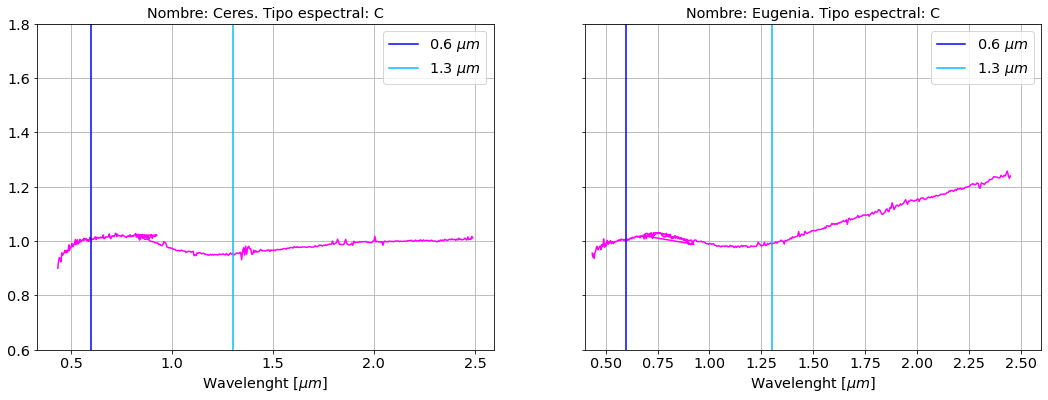

In [107]:
plot_spectra(-1,-34)

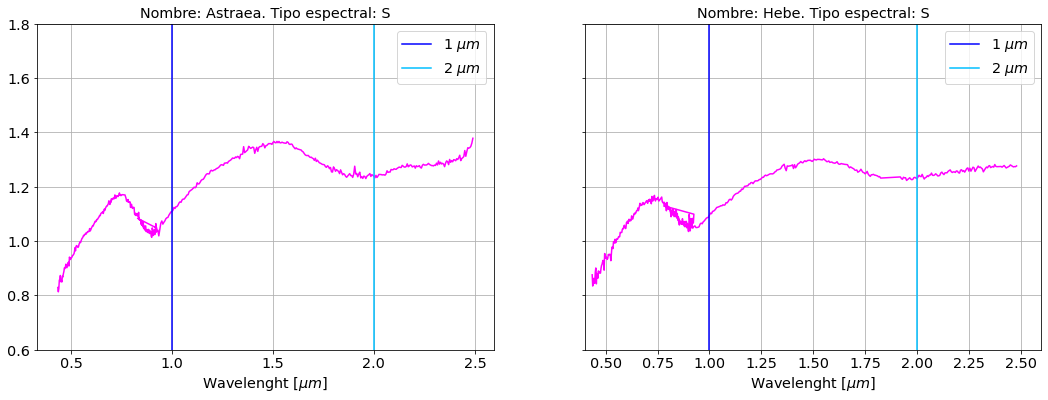

In [108]:
plot_spectra(-5,-6)

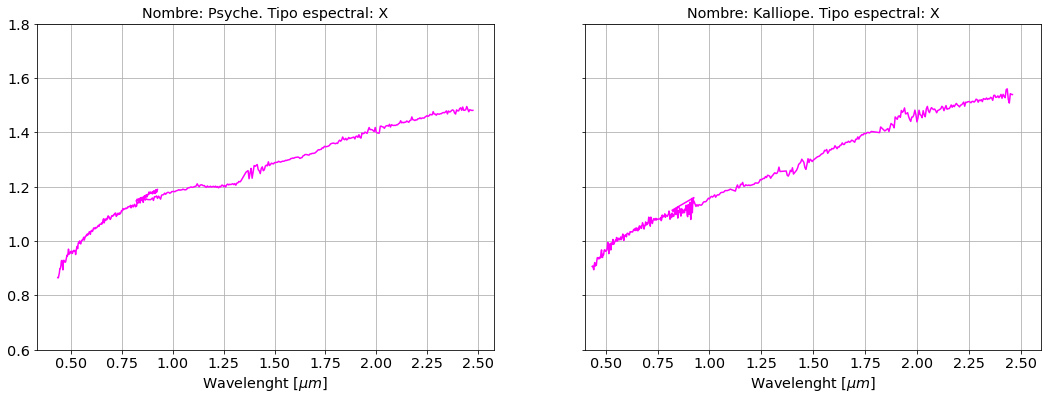

In [109]:
plot_spectra(-12,-17)

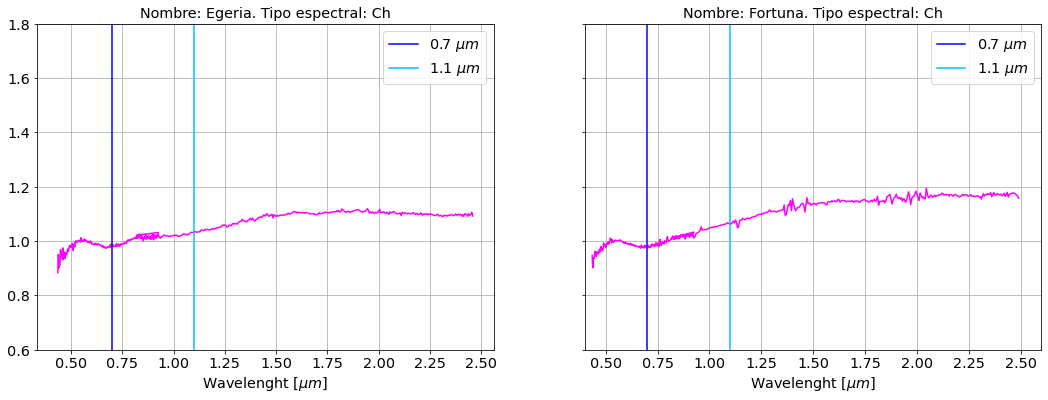

In [110]:
plot_spectra(-9,-14)